# Thompson Sampling

## Importing the libraries

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [43]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [44]:
import random

N = 1000 # number of rounds
d = 10 # number of adverts
ads_selected = [] # N elements at the end
numbers_of_rewards_1 = [0] * d # Ni1(n)
numbers_of_rewards_0 = [0] * d # Ni0(n)
# [0] * 10 --> initialized as [0,0,0,0,0,0,0,0,0,0]
total_reward = 0

for n in range(0, N):
  ad = 0
  max_random = 0
  for i in range(0, d):
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
    if random_beta > max_random:
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  if reward == 1:
    numbers_of_rewards_1[ad] += 1
  else:
    numbers_of_rewards_0[ad] += 1
  total_reward += reward

In [45]:
print('Numbers of Rewards 1', numbers_of_rewards_1)
print('Numbers of Rewards 0', numbers_of_rewards_0)
print('Total Reward: ', total_reward)

Numbers of Rewards 1 [25, 8, 2, 4, 115, 0, 3, 21, 7, 1]
Numbers of Rewards 0 [110, 51, 28, 39, 349, 21, 35, 109, 51, 21]
Total Reward:  186


## Visualising the results - Histogram

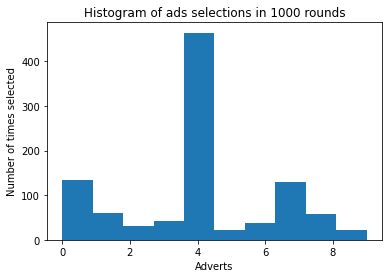

In [46]:
plt.hist(ads_selected)
title = 'Histogram of ads selections in ' + str(N) + ' rounds'
plt.title(title)
plt.xlabel('Adverts')
plt.ylabel('Number of times selected')
plt.show()